# Playground2: Kilosort + Template Metrics

In [1]:
from pathlib import Path
import spikeinterface.full as si

print(f"SpikeInterface version: {si.__version__}")

SpikeInterface version: 0.103.3


In [2]:
# Check if Kilosort output already exists

# For kilosort/phy output files we can use the read_phy
# most formats will have a read_xx that can used.
analyzer = si.load_sorting_analyzer('/Users/jf5479/Downloads/kilosort4_sa/')


/Users/jf5479/Dropbox/Python/spikeinterface/src/spikeinterface/core/base.py:1117: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.101.2 is recommended
  warnings.warn(


In [3]:
# Random spikes selection
if not analyzer.has_extension("random_spikes"):
    print("Computing random_spikes...")
    analyzer.compute("random_spikes", method="uniform", max_spikes_per_unit=500)

In [4]:
# Waveforms
if not analyzer.has_extension("waveforms"):
    print("Computing waveforms...")
    analyzer.compute("waveforms", ms_before=1.5, ms_after=2.0, **job_kwargs)

In [5]:
# Templates
if not analyzer.has_extension("templates"):
    print("Computing templates...")
    analyzer.compute("templates", operators=["average", "median", "std"])

In [53]:
# Noise levels
if not analyzer.has_extension("noise_levels"):
    print("Computing noise_levels...")
    analyzer.compute("noise_levels")

##  Compute Template Metrics

In [4]:
# Compute template metrics with multi-channel metrics included
analyzer.compute(
    "template_metrics",
    smooth=True,              # Enable/disable smoothing
    smooth_window_frac=0.1,   # Window as fraction of template length
    smooth_polyorder=3,       # Polynomial order
    min_thresh_detect_peaks_troughs=0.4
)


/Users/jf5479/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_theil_sen.py:127: ConvergenceWarning: Maximum number of iterations 1000 reached in spatial median for TheilSen regressor.
  warnings.warn(
/Users/jf5479/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_theil_sen.py:127: ConvergenceWarning: Maximum number of iterations 1000 reached in spatial median for TheilSen regressor.
  warnings.warn(
/Users/jf5479/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_theil_sen.py:127: ConvergenceWarning: Maximum number of iterations 1000 reached in spatial median for TheilSen regressor.
  warnings.warn(
/Users/jf5479/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_theil_sen.py:127: ConvergenceWarning: Maximum number of iterations 1000 reached in spatial median for TheilSen regressor.
  warnings.warn(
/Users/jf5479/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_theil_sen.py:127: ConvergenceWarning: Maximum number of iterations 10

In [5]:


# Get the metrics as a DataFrame
template_metrics = analyzer.get_extension("template_metrics").get_data()
template_metrics

,peak_to_valley,peak_trough_ratio,half_width,repolarization_slope,recovery_slope,num_positive_peaks,num_negative_peaks,waveform_duration,peak_before_to_trough_ratio,peak_after_to_trough_ratio,peak_before_to_peak_after_ratio,main_peak_to_trough_ratio,trough_width,peak_before_width,peak_after_width,waveform_baseline_flatness,velocity_above,velocity_below,exp_decay,spread
0,0.001200,-0.412584,0.001747,16671.090016,-17191.329586,2,1,643.333333,2.358820,0.412584,5.717192,2.358820,818.069771,367.576821,249.381750,0.243320,109.202199,NaN,0.011540,60.0
1,0.000633,-0.195374,0.000163,321619.078371,-10477.415662,2,1,633.333333,0.103992,0.195374,0.532271,0.195374,210.974071,NaN,1035.993495,0.104157,-1979.834401,NaN,0.018553,45.0
2,0.001250,-0.331924,0.000647,12705.168897,-16207.805607,2,1,616.666667,2.229546,0.331924,6.717041,2.229546,806.583590,362.992828,231.258891,0.200324,NaN,NaN,0.006662,105.0
3,0.000680,-0.234461,0.000220,118995.043916,-7777.377258,2,1,680.000000,0.167090,0.234461,0.712656,0.234461,277.076137,203.583558,1012.443132,0.177848,NaN,1191.369764,0.010610,105.0
4,0.000770,-0.267867,0.000260,75660.685138,-7251.490738,2,1,770.000000,0.252582,0.267867,0.942940,0.267867,322.024228,403.049068,947.586212,0.210937,783.064501,636.599008,0.009241,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.001350,-0.234132,0.000517,20857.109735,-7038.372419,2,1,516.666667,1.357400,0.234132,5.797585,1.357400,613.535510,475.232721,629.538080,0.253322,NaN,NaN,0.000379,180.0
326,0.000620,-0.685191,0.000397,71418.515246,-21462.465005,2,1,620.000000,0.147044,0.685191,0.214603,0.685191,445.745184,NaN,809.107535,0.168947,NaN,-1228.577175,NaN,150.0
327,0.001237,-0.263875,0.000547,36273.785365,-7774.517050,2,1,703.333333,1.185248,0.263875,4.491711,1.185248,624.165680,629.583000,454.026367,0.389132,NaN,NaN,0.000723,120.0
328,0.001137,-0.329055,0.000537,27766.452527,-9930.771106,2,1,1136.666667,0.994842,0.329055,3.023334,0.994842,648.431952,667.718074,488.826489,0.353984,-400.589557,NaN,0.000703,105.0


In [ ]:
# Spike amplitudes
if not analyzer.has_extension("spike_amplitudes"):
    print("Computing spike_amplitudes...")
    analyzer.compute("spike_amplitudes", **job_kwargs)

In [ ]:
# Correlograms
if not analyzer.has_extension("correlograms"):
    print("Computing correlograms...")
    analyzer.compute("correlograms")

In [8]:
# Quality metrics
if not analyzer.has_extension("quality_metrics"):
    print("Computing quality_metrics...")
    analyzer.compute("quality_metrics")

quality_metrics = analyzer.get_extension("quality_metrics").get_data()
quality_metrics

,amplitude_median,sync_spike_2,sync_spike_4,sync_spike_8,firing_rate,snr,amplitude_cv_median,amplitude_cv_range,presence_ratio,amplitude_cutoff,sliding_rp_violation,isi_violations_ratio,isi_violations_count,sd_ratio,rp_contamination,rp_violations,num_spikes,firing_range
0,-10.530000,0.105795,0.006802,0.000190,6.121579,0.978010,1.187101,1.122601,1.0,0.000089,NaN,0.951853,460,1.337394,1.0,261,26315,13.80
1,-43.680000,0.063004,0.002108,0.000031,30.128681,3.898206,NaN,NaN,1.0,0.000002,NaN,0.454454,5320,1.109406,1.0,4075,129515,71.00
2,-9.165000,0.124962,0.009469,0.000121,3.857188,0.944906,1.398181,1.107468,1.0,0.000083,NaN,0.797423,153,1.301471,1.0,88,16581,8.02
3,-30.224998,0.086343,0.008367,0.000245,11.399187,2.839966,0.341267,0.324181,1.0,0.000136,NaN,0.408176,684,1.120740,1.0,605,49002,17.20
4,-27.884998,0.140825,0.017389,0.000623,4.481558,2.428674,NaN,NaN,1.0,0.000122,NaN,0.760583,197,1.369003,1.0,129,19265,10.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,-12.090000,0.336032,0.058526,0.003946,5.660047,2.556509,NaN,NaN,1.0,0.000011,NaN,4.158359,1718,2.544345,1.0,1176,24331,15.82
326,-15.795000,0.226084,0.023752,0.001239,3.192805,3.402270,0.811786,1.248298,1.0,0.000031,NaN,3.559917,468,2.754459,1.0,264,13725,9.20
327,-16.574999,0.297615,0.037736,0.001424,1.306898,3.373796,0.761374,0.643952,1.0,0.000079,NaN,1.952197,43,2.513939,1.0,37,5618,4.00
328,-14.235000,0.348725,0.054768,0.001751,11.425706,2.804173,NaN,NaN,1.0,0.000011,NaN,1.230135,2071,2.367420,1.0,1152,49116,30.80


In [12]:
import pandas as pd
import numpy as np
import spikeinterface.comparison as sc  
# Get metrics from SortingAnalyzer
qm = analyzer.get_extension("quality_metrics").get_data()
tm = analyzer.get_extension("template_metrics").get_data()
metrics = pd.concat([qm, tm], axis=1)

qm

,amplitude_median,sync_spike_2,sync_spike_4,sync_spike_8,firing_rate,snr,amplitude_cv_median,amplitude_cv_range,presence_ratio,amplitude_cutoff,sliding_rp_violation,isi_violations_ratio,isi_violations_count,sd_ratio,rp_contamination,rp_violations,num_spikes,firing_range
0,-10.530000,0.105795,0.006802,0.000190,6.121579,0.978010,1.187101,1.122601,1.0,0.000089,NaN,0.951853,460,1.337394,1.0,261,26315,13.80
1,-43.680000,0.063004,0.002108,0.000031,30.128681,3.898206,NaN,NaN,1.0,0.000002,NaN,0.454454,5320,1.109406,1.0,4075,129515,71.00
2,-9.165000,0.124962,0.009469,0.000121,3.857188,0.944906,1.398181,1.107468,1.0,0.000083,NaN,0.797423,153,1.301471,1.0,88,16581,8.02
3,-30.224998,0.086343,0.008367,0.000245,11.399187,2.839966,0.341267,0.324181,1.0,0.000136,NaN,0.408176,684,1.120740,1.0,605,49002,17.20
4,-27.884998,0.140825,0.017389,0.000623,4.481558,2.428674,NaN,NaN,1.0,0.000122,NaN,0.760583,197,1.369003,1.0,129,19265,10.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,-12.090000,0.336032,0.058526,0.003946,5.660047,2.556509,NaN,NaN,1.0,0.000011,NaN,4.158359,1718,2.544345,1.0,1176,24331,15.82
326,-15.795000,0.226084,0.023752,0.001239,3.192805,3.402270,0.811786,1.248298,1.0,0.000031,NaN,3.559917,468,2.754459,1.0,264,13725,9.20
327,-16.574999,0.297615,0.037736,0.001424,1.306898,3.373796,0.761374,0.643952,1.0,0.000079,NaN,1.952197,43,2.513939,1.0,37,5618,4.00
328,-14.235000,0.348725,0.054768,0.001751,11.425706,2.804173,NaN,NaN,1.0,0.000011,NaN,1.230135,2071,2.367420,1.0,1152,49116,30.80


{'total_units': 330, 'counts': {'NOISE': 138, 'GOOD': 21, 'MUA': 171}, 'percentages': {'NOISE': 41.8, 'GOOD': 6.4, 'MUA': 51.8}}


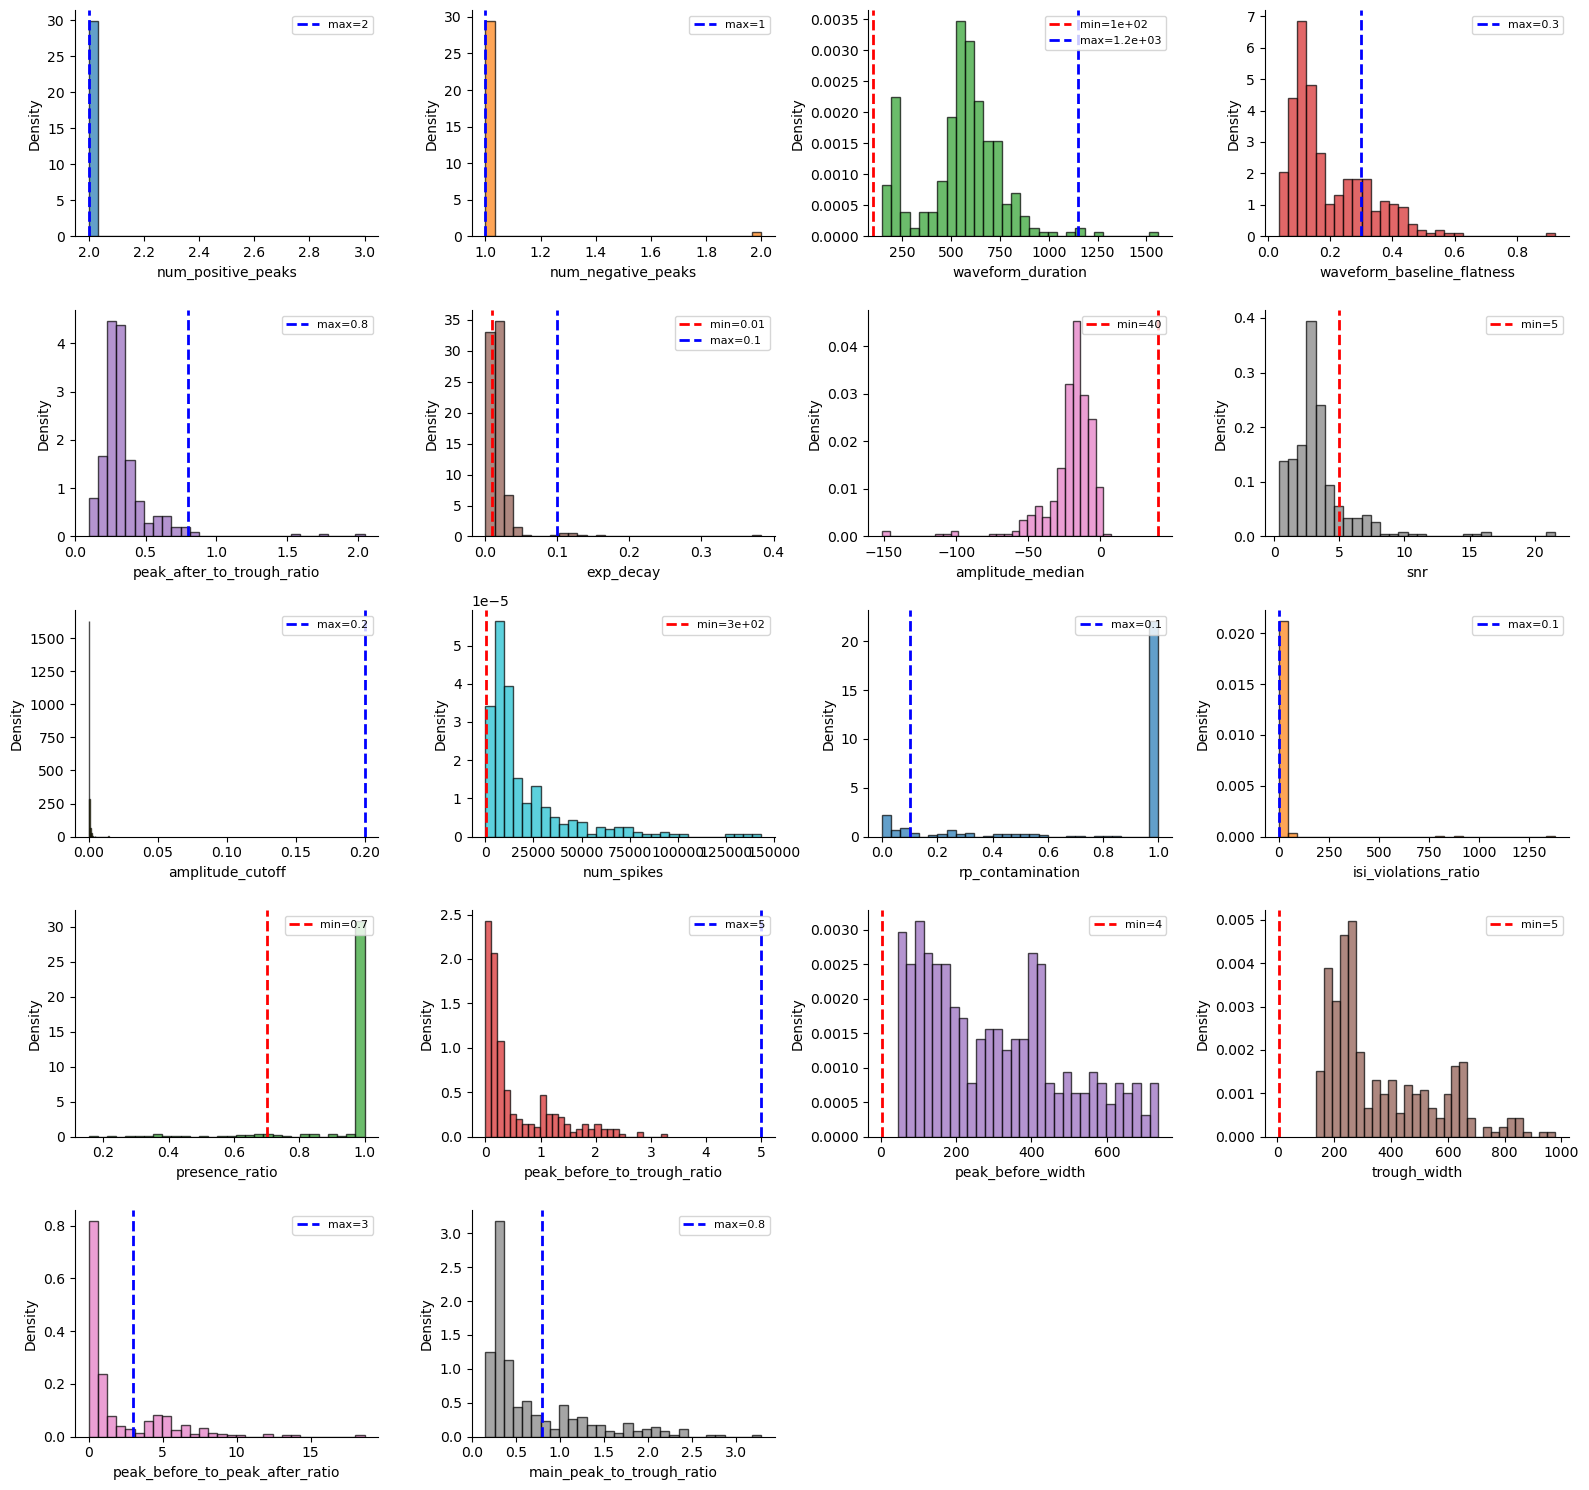

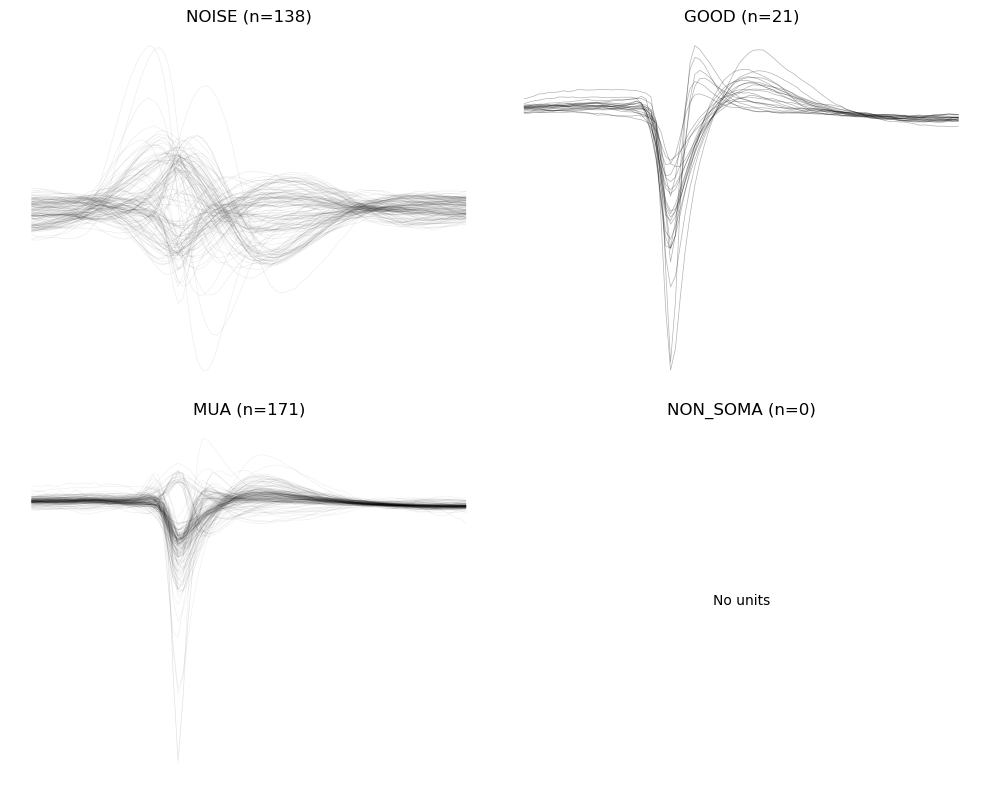

In [ ]:


# Classify with default thresholds
unit_type, labels = sc.classify_units(metrics)

# Or customize thresholds
thresholds = sc.get_default_thresholds() # probably not correct format. where should i put this? 
thresholds["snr"]["min"] = 3  # Lower threshold
thresholds["amplitude_median"]["min"] = np.nan  # Disable

unit_type, labels = sc.classify_units(metrics, thresholds)

# plots!
# Get summary
summary = sc.get_classification_summary(unit_type, labels)
print(summary)

import spikeinterface.widgets as sw
# Plot histograms with threshold lines
sw.plot_classification_histograms(metrics)

# Plot waveform overlay by type
sw.plot_waveform_overlay(analyzer, unit_type, labels)






In [16]:
unit_type
labels

array(['NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE', 'NOISE',
       'NOISE', 'NOI

## Summary

In [ ]:
print(f"Total units: {len(sorting.unit_ids)}")
print(f"Analyzer saved to: {analyzer_folder}")
print(f"\nAvailable extensions:")
for ext_name in analyzer.get_loaded_extension_names():
    print(f"  - {ext_name}")

In [ ]:
# Combine metrics
combined_metrics = template_metrics.join(quality_metrics, how="outer")
combined_metrics

In [ ]:
# Save metrics to CSV
output_folder.mkdir(parents=True, exist_ok=True)
metrics_csv = output_folder / "combined_metrics.csv"
combined_metrics.to_csv(metrics_csv)
print(f"Metrics saved to: {metrics_csv}")